Problema 2

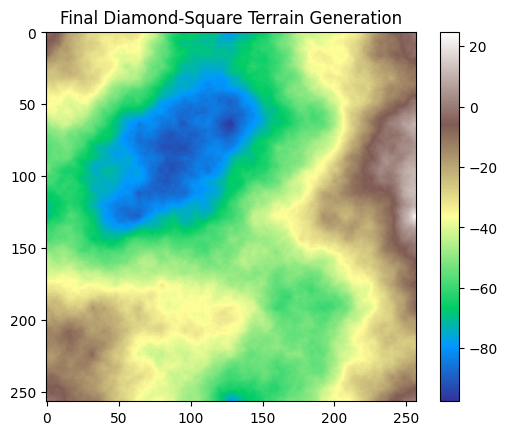

In [3]:
import numpy as np
import matplotlib.pyplot as plt


size = 257  # O cualquier otro valor impar de tu elección.
roughness = 0.5  # O cualquier valor entre 0 y 1 para definir la rugosidad.
corner_values = [0, 0, 0, 0]  # O cualquier otro conjunto de valores iniciales para las esquinas.



def diamond_square_final(size, roughness, corner_values):
    # Inicialización de la cuadrícula
    grid = np.zeros((size, size))
    
    # Establecer los valores iniciales de las cuatro esquinas
    grid[0, 0] = corner_values[0]
    grid[0, size-1] = corner_values[1]
    grid[size-1, 0] = corner_values[2]
    grid[size-1, size-1] = corner_values[3]
    
    # Función para el paso de diamante
    def diamond_step(x, y, reach):
        # Calcula el promedio de los cuatro vértices del cuadrado
        avg = (grid[x, y] + grid[x+reach, y] + grid[x, y+reach] + grid[x+reach, y+reach]) / 4
        # Establece el valor del punto medio del cuadrado
        grid[x+reach//2, y+reach//2] = avg + (np.random.rand() - 0.5) * roughness * reach
    
    # Función para el paso de cuadrado
    def square_step(x, y, reach):
        def grid_val(i, j):
            if 0 <= i < size and 0 <= j < size:
                return grid[i, j]
            return 0
        
        # Calcula el promedio de los cuatro (o tres, o dos) valores adyacentes
        cnt = 4
        avg = grid_val(x-reach//2, y) + grid_val(x+reach//2, y) + grid_val(x, y-reach//2) + grid_val(x, y+reach//2)
        if x-reach//2 < 0 or x+reach//2 >= size:
            cnt -= 1
        if y-reach//2 < 0 or y+reach//2 >= size:
            cnt -= 1
        avg /= cnt
        # Establece el valor del punto medio del diamante
        grid[x, y] = avg + (np.random.rand() - 0.5) * roughness * reach
    
    # Aplicación del algoritmo
    reach = size - 1
    while reach > 1:
        # Paso de diamante
        for y in range(0, size-1, reach):
            for x in range(0, size-1, reach):
                diamond_step(x, y, reach)
        
        half_reach = reach // 2
        # Paso de cuadrado
        for y in range(0, size, half_reach):
            for x in range((y+half_reach) % reach, size, reach):
                square_step(x, y, reach)
        
        # Reducción del tamaño del paso y de la magnitud del valor aleatorio
        reach = half_reach
    
    return grid

# Generación del terreno
terrain_final = diamond_square_final(size, roughness, corner_values)

# Visualización
plt.imshow(terrain_final, cmap='terrain')
plt.colorbar()
plt.title('Final Diamond-Square Terrain Generation')
plt.show()


Luego de crear la cuadricula de tamaño 2^n +1*2^n +1 se toma un cuadrado de la cuadrícula y se calcula el valor del punto medio. El valor del punto medio es el promedio de los cuatro vértices del cuadrado, más un valor aleatorio. La magnitud del valor aleatorio disminuye con cada iteración para asegurar que los detalles más finos sean menos pronunciados.
El valor del punto medio es el promedio de los cuatro vértices del diamante (o los vértices disponibles si el diamante está en el borde de la cuadrícula), más un valor aleatorio.

El resultado es una matriz que representa un terreno, donde cada valor en la matriz representa la altura en ese punto particular. El algoritmo garantiza que el terreno tiene un aspecto natural debido a su naturaleza fractal y a la reducción gradual de la variabilidad en los detalles más finos.